In [1]:
import os
from urllib.request import urlretrieve
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

URL = 'https://data.seattle.gov/api/views/gmvv-hehd/rows.csv?accessType=DOWNLOAD&bom=true&format=true'



def get_fremont_data(filename='Fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    data.columns = ['West', 'East']
    data['Total'] = data['West'] + data['East']
    return data

In [2]:
data = get_fremont_data()

In [3]:
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x103bf4588>)

In [4]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


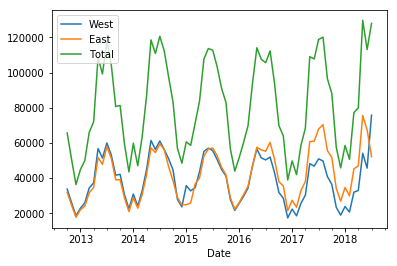

In [5]:
data.resample('M').sum().plot();

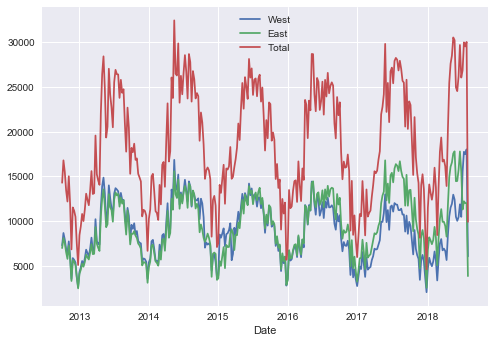

In [6]:
plt.style.use('seaborn')
data.resample('W').sum().plot();

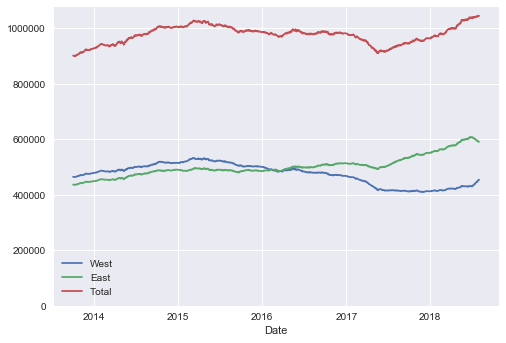

In [7]:
ax=data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

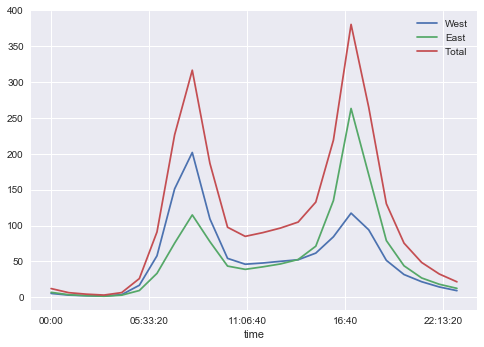

In [8]:
data.groupby(data.index.time).mean().plot();

In [9]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


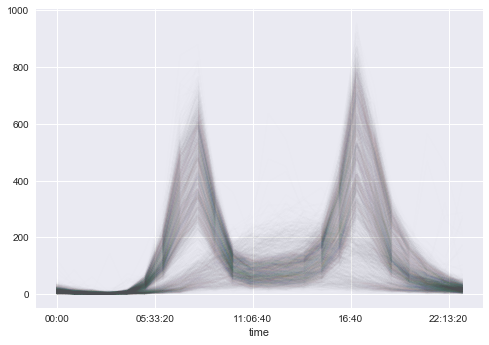

In [12]:
pivoted.plot(legend=False, alpha=0.00);